In [8]:
import pandas as pd

df=pd.read_csv("data/dataset.csv")

df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   subject   18539 non-null  str  
 1   body      19998 non-null  str  
 2   answer    19996 non-null  str  
 3   type      20000 non-null  str  
 4   queue     20000 non-null  str  
 5   priority  20000 non-null  str  
 6   language  20000 non-null  str  
 7   tag_1     20000 non-null  str  
 8   tag_2     19954 non-null  str  
 9   tag_3     19905 non-null  str  
 10  tag_4     18461 non-null  str  
 11  tag_5     13091 non-null  str  
 12  tag_6     7351 non-null   str  
 13  tag_7     3928 non-null   str  
 14  tag_8     1907 non-null   str  
dtypes: str(15)
memory usage: 2.3 MB


,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
count,18539,19998,19996,20000,20000,20000,20000,20000,19954,19905,18461,13091,7351,3928,1907
unique,18539,19998,19996,4,10,3,2,148,204,344,481,578,566,492,386
top,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,Technical Support,medium,en,Technical,Performance,IT,Tech Support,Tech Support,Resolution,Resolution,Documentation
freq,1,1,1,7978,5824,8144,11923,5034,2795,3309,3436,2287,841,417,162


In [ ]:
df_types = df[['type']].value_counts()
print(df_types)




type    
Incident    7978
Request     5763
Problem     4184
Change      2075
Name: count, dtype: int64


### Analyse de la distribution des types de tickets

Répartition des classes :
type
Incident    39.890
Request     28.815
Problem     20.920
Change      10.375
Name: proportion, dtype: float64


C:\Users\oclaz\AppData\Local\Temp\ipykernel_24456\3764040422.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='type', data=df, order=type_counts.index, palette='viridis')


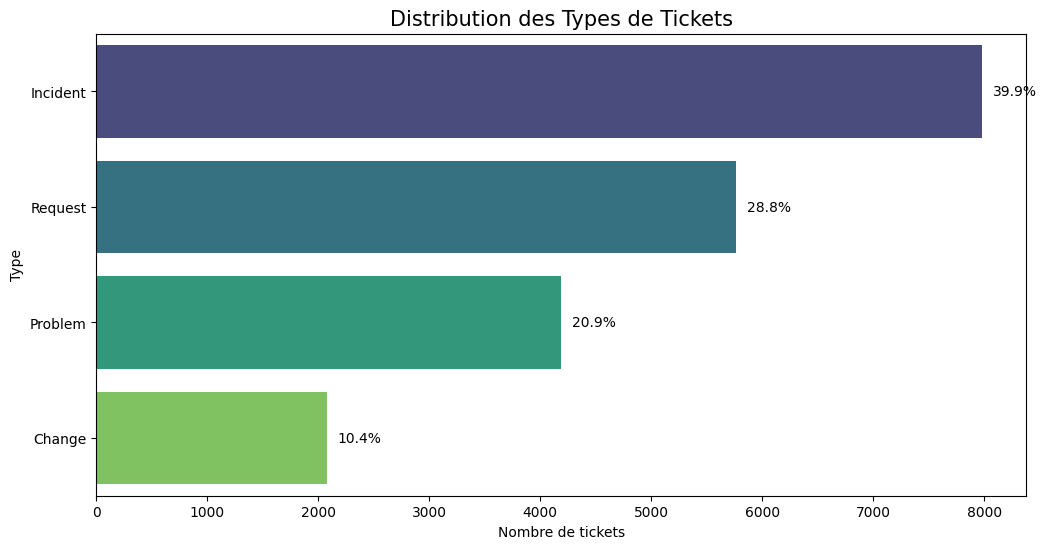

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des comptes et pourcentages
type_counts = df['type'].value_counts()
type_percent = df['type'].value_counts(normalize=True) * 100

print("Répartition des classes :")
print(type_percent)

# Visualisation
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='type', data=df, order=type_counts.index, palette='viridis')

plt.title('Distribution des Types de Tickets', fontsize=15)
plt.xlabel('Nombre de tickets')
plt.ylabel('Type')

# Ajout des pourcentages sur les barres
total = len(df['type'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_width() + 100
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), va='center')

plt.show()

### Analyse de la longueur des emails

Statistiques de longueur (en mots) :
count    20000.00000
mean        62.16330
std         36.82158
min          1.00000
25%         33.00000
50%         57.00000
75%         87.00000
90%        109.00000
95%        128.00000
99%        167.00000
max        283.00000
Name: word_count, dtype: float64


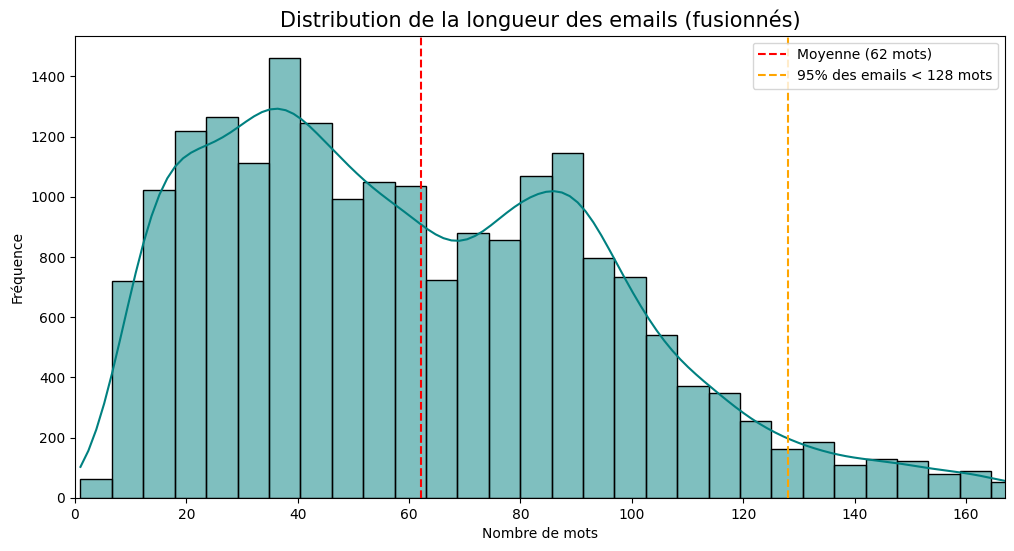

In [17]:
df['subject'] = df['subject'].fillna('')
df['body'] = df['body'].fillna('')

# 2. CRÉATION DE LA COLONNE MANQUANTE 'text'
# C'est cette ligne qui manquait ou n'a pas été exécutée
df['text'] = df['subject'] + " " + df['body']

# Calcul du nombre de mots (approximation des tokens)
# On utilise une méthode simple (split par espace) qui est une bonne approximation avant tokenization réelle
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Statistiques descriptives
print("Statistiques de longueur (en mots) :")
print(df['word_count'].describe([0.25, 0.5, 0.75, 0.90, 0.95, 0.99]))

# Visualisation de la distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['word_count'], bins=50, kde=True, color='teal')

# Lignes verticales pour la moyenne et le 95ème percentile
mean_len = df['word_count'].mean()
p95_len = df['word_count'].quantile(0.95)

plt.axvline(mean_len, color='red', linestyle='--', label=f'Moyenne ({int(mean_len)} mots)')
plt.axvline(p95_len, color='orange', linestyle='--', label=f'95% des emails < {int(p95_len)} mots')

plt.title('Distribution de la longueur des emails (fusionnés)', fontsize=15)
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.legend()
plt.xlim(0, df['word_count'].quantile(0.99)) # On zoome pour ignorer les outliers extrêmes
plt.show()

In [18]:
# --- NORMALISATION (LOWERCASE) ---

# 1. Mise en minuscules de toute la colonne 'text'
# La méthode .str est vectorisée (rapide)
df['text'] = df['text'].str.lower()

# 2. Vérification avant/après (pour être sûr)
print("Exemple après normalisation :")
print("-" * 30)
print(df['text'].iloc[0]) 
print("-" * 30)

# (Optionnel) Vérifier si cela a réduit le nombre de mots uniques
unique_words = set(' '.join(df['text']).split())
print(f"Nombre de mots uniques (vocabulaire approximatif) : {len(unique_words)}")

Exemple après normalisation :
------------------------------
unvorhergesehener absturz der datenanalyse-plattform die datenanalyse-plattform brach unerwartet ab, da die speicheroberfläche zu gering war. ich habe versucht, laravel 8 und meinen macbook pro neu zu starten, aber das problem behält sich bei. ich benötige ihre unterstützung, um diesen fehler zu beheben.
------------------------------
Nombre de mots uniques (vocabulaire approximatif) : 33099
Nombre de mots uniques (vocabulaire approximatif) : 33099


In [19]:
import re

# --- SUPPRESSION PONCTUATION ---

# 1. Remplacer tout ce qui n'est PAS un mot (\w) ou un espace (\s) par un ESPACE
# Cela gère : . , ! ? ; : ( ) [ ] { } " ' ...
df['text'] = df['text'].str.replace(r'[^\w\s]', ' ', regex=True)

# 2. Nettoyer les espaces multiples créés par l'étape précédente
# Ex: "mot1  mot2" -> "mot1 mot2"
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Vérification
print("Exemple après nettoyage ponctuation :")
print("-" * 30)
print(df['text'].iloc[0])
print("-" * 30)

Exemple après nettoyage ponctuation :
------------------------------
unvorhergesehener absturz der datenanalyse plattform die datenanalyse plattform brach unerwartet ab da die speicheroberfläche zu gering war ich habe versucht laravel 8 und meinen macbook pro neu zu starten aber das problem behält sich bei ich benötige ihre unterstützung um diesen fehler zu beheben
------------------------------


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oclaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\oclaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Exemple de tokens :
------------------------------
['unvorhergesehener', 'absturz', 'der', 'datenanalyse', 'plattform', 'die', 'datenanalyse', 'plattform', 'brach', 'unerwartet', 'ab', 'da', 'die', 'speicheroberfläche', 'zu', 'gering', 'war', 'ich', 'habe', 'versucht', 'laravel', '8', 'und', 'meinen', 'macbook', 'pro', 'neu', 'zu', 'starten', 'aber', 'das', 'problem', 'behält', 'sich', 'bei', 'ich', 'benötige', 'ihre', 'unterstützung', 'um', 'diesen', 'fehler', 'zu', 'beheben']
------------------------------


C:\Users\oclaz\AppData\Local\Temp\ipykernel_24456\133298170.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y), y=list(x), palette='viridis')


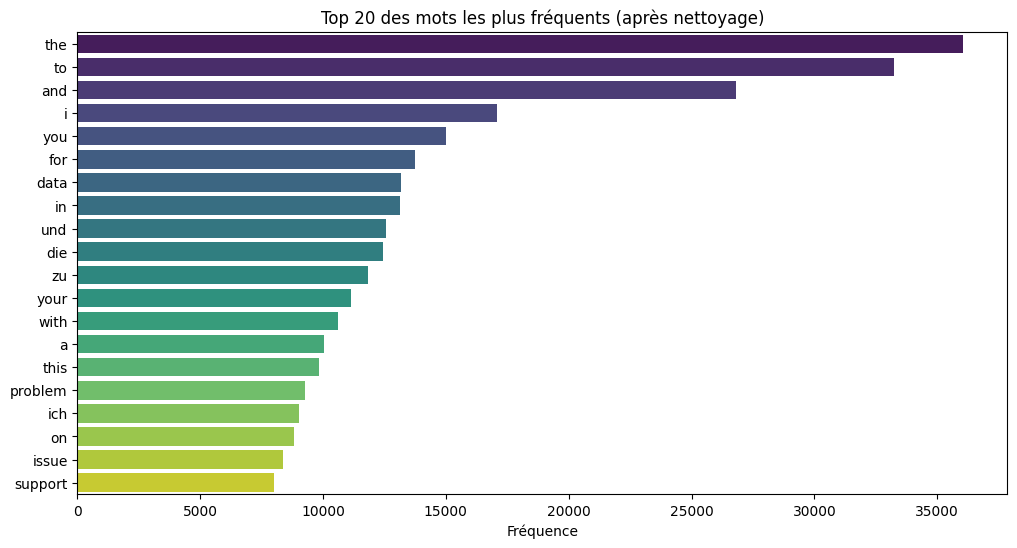

In [23]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter


nltk.download('punkt')
nltk.download('punkt_tab')

df['tokens'] = df['text'].apply(word_tokenize)
# Vérification
print("Exemple de tokens :")
print("-" * 30)
print(df['tokens'].iloc[0])
print("-" * 30)

all_words = [word for tokens in df['tokens'] for word in tokens]
word_freq = Counter(all_words)

common_words = word_freq.most_common(20)

# Visualisation
x, y = zip(*common_words) # Séparer mots et comptes
plt.figure(figsize=(12, 6))
sns.barplot(x=list(y), y=list(x), palette='viridis')
plt.title('Top 20 des mots les plus fréquents (après nettoyage)')
plt.xlabel('Fréquence')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oclaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Nombre total de stop words (DE + EN ) : 424
Exemple Avant : ['unvorhergesehener', 'absturz', 'der', 'datenanalyse', 'plattform', 'die', 'datenanalyse', 'plattform', 'brach', 'unerwartet', 'ab', 'da', 'die', 'speicheroberfläche', 'zu', 'gering', 'war', 'ich', 'habe', 'versucht', 'laravel', '8', 'und', 'meinen', 'macbook', 'pro', 'neu', 'zu', 'starten', 'aber', 'das', 'problem', 'behält', 'sich', 'bei', 'ich', 'benötige', 'ihre', 'unterstützung', 'um', 'diesen', 'fehler', 'zu', 'beheben']
Exemple Après : ['unvorhergesehener', 'absturz', 'datenanalyse', 'plattform', 'datenanalyse', 'plattform', 'brach', 'unerwartet', 'speicheroberfläche', 'gering', 'versucht', 'laravel', 'macbook', 'pro', 'neu', 'starten', 'problem', 'behält', 'benötige', 'unterstützung', 'fehler', 'beheben']


C:\Users\oclaz\AppData\Local\Temp\ipykernel_24456\3648730435.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y_val), y=list(x_val), palette='magma')


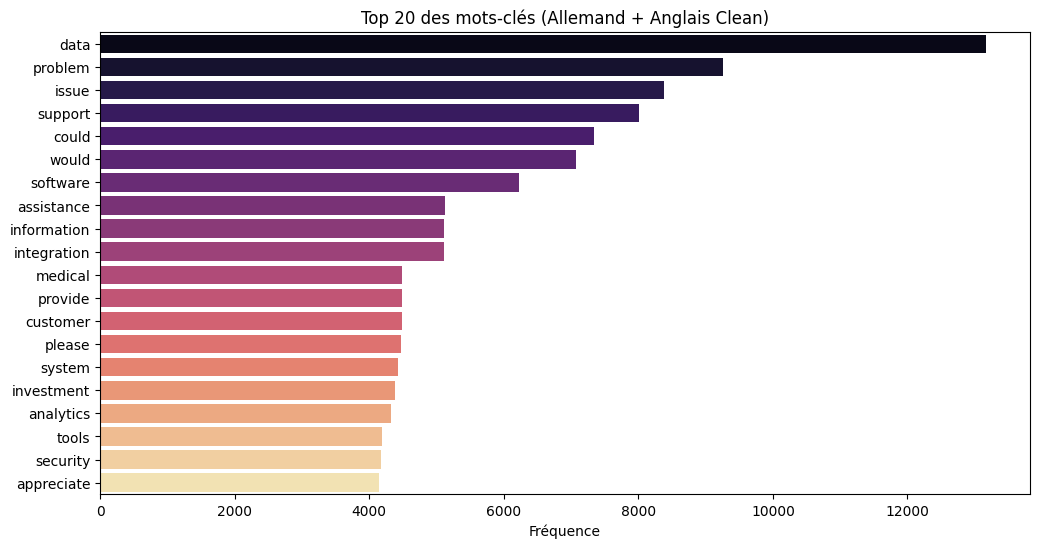

In [25]:
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Téléchargement (si ce n'est pas déjà fait)
nltk.download('stopwords')

# 2. Création de la liste MIXTE (Allemand + Anglais)
# On additionne les deux listes avant de les convertir en set
stop_words_list = stopwords.words('german') + stopwords.words('english')
stop_words = set(stop_words_list)


print(f"Nombre total de stop words (DE + EN ) : {len(stop_words)}")

# 3. Application du filtre
# On enlève aussi les tokens de moins de 2 lettres (souvent du bruit)
df['tokens_clean'] = df['tokens'].apply(lambda tokens: [
    word for word in tokens 
    if word not in stop_words and len(word) > 2
])

# 4. Vérification
print("Exemple Avant :", df['tokens'].iloc[0])
print("Exemple Après :", df['tokens_clean'].iloc[0])

# --- VISUALISATION ---
# On refait le compte sur la colonne nettoyée
all_words_clean = [word for tokens in df['tokens_clean'] for word in tokens]
word_freq_clean = Counter(all_words_clean).most_common(20)

if word_freq_clean:
    x_val, y_val = zip(*word_freq_clean)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(y_val), y=list(x_val), palette='magma')
    plt.title('Top 20 des mots-clés (Allemand + Anglais Clean)')
    plt.xlabel('Fréquence')
    plt.show()
else:
    print("Attention : La liste de mots est vide après nettoyage. Vérifiez vos données.")